
Correlation Matrix:
                 Close  Close_ixic  Close_sp500
Close        1.000000    0.779768     0.738614
Close_ixic   0.779768    1.000000     0.971028
Close_sp500  0.738614    0.971028     1.000000


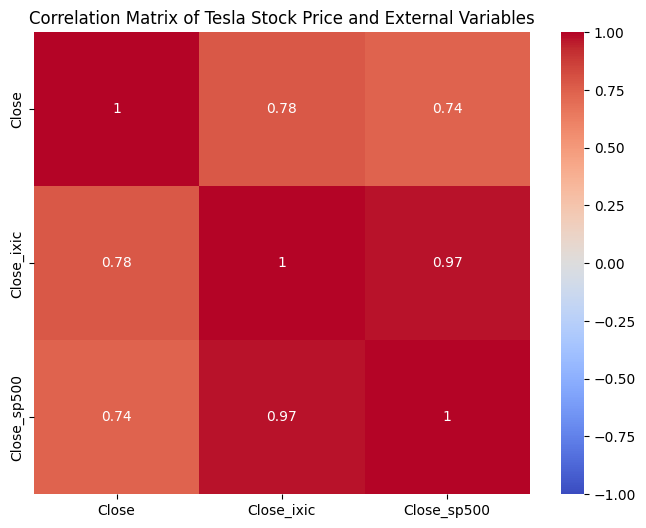

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the datasets
# Replace 'file_path' with the path or DataFrame variables for your datasets
tesla_close = pd.read_csv('Get_data/Tesla_Close_2019_2024.csv', parse_dates=['Date'], index_col='Date')
ixic = pd.read_csv('Get_data/IXIC_Close_2019_2024.csv', parse_dates=['Date'], index_col='Date')
sp500 = pd.read_csv('Get_data/SP500_Close_2019_2024.csv', parse_dates=['Date'], index_col='Date')

# Merge the datasets on 'Date' with suffixes to avoid conflicts
merged_data = tesla_close.merge(ixic, left_index=True, right_index=True, how='inner', suffixes=('', '_ixic'))
merged_data = merged_data.merge(sp500, left_index=True, right_index=True, how='inner', suffixes=('', '_sp500'))

# Step 2: Check for correlations
correlation_matrix = merged_data[['Close', 'Close_ixic', 'Close_sp500']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Tesla Stock Price and External Variables')
plt.show()
